In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import _cm
import seaborn as sns
import plotly.express as px
import numpy as np
 

In [57]:
import pickle
f = open('../csv_file/bankdata/bank_ctg_final.pkl','rb')
ctg = pickle.load(f)
f.close()

In [58]:
ctg['month_ct']

0       May
1       May
2       May
3       May
4       May
       ... 
7229    Nov
7230    Nov
7231    Nov
7232    Nov
7233    Nov
Name: month_ct, Length: 7234, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [59]:
pd.set_option('float_format', '{:.2f}'.format)
pd.options.mode.chained_assignment = None


In [60]:
ctg.head()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,...,housing_ct,loan_ct,contact_ct,result_ct,job_ct,marital_ct,poutcome_ct,day_ct,month_ct,education_ct
0,1.00,2,3.00,1,1,1,NaN,5.00,5,NaN,...,yes,no,telephone,no,management,married,NaN,5th,May,tertiary
1,2.00,1,2.00,1,1,2,NaN,5.00,5,NaN,...,yes,yes,cellular,no,technician,single,NaN,5th,May,secondary
2,3.00,2,2.00,1,1,1,NaN,5.00,5,NaN,...,yes,no,telephone,no,blue-collar,married,NaN,5th,May,secondary
3,2.00,2,2.00,1,2,1,NaN,5.00,5,NaN,...,no,no,telephone,no,technician,married,NaN,5th,May,secondary
4,2.00,1,2.00,1,1,2,NaN,5.00,5,NaN,...,yes,yes,cellular,no,technician,single,NaN,5th,May,secondary


In [61]:
ctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   job           7190 non-null   float64 
 1   marital       7234 non-null   int64   
 2   education     6961 non-null   float64 
 3   default       7234 non-null   int64   
 4   housing       7234 non-null   int64   
 5   loan          7234 non-null   int64   
 6   contact       5196 non-null   float64 
 7   day           7222 non-null   float64 
 8   month         7234 non-null   int64   
 9   poutcome      1334 non-null   float64 
 10  result        7234 non-null   int64   
 11  default_ct    7234 non-null   category
 12  housing_ct    7234 non-null   category
 13  loan_ct       7234 non-null   category
 14  contact_ct    6403 non-null   category
 15  result_ct     7234 non-null   category
 16  job_ct        7190 non-null   category
 17  marital_ct    7234 non-null   category
 18  poutcome

In [62]:
ctg.loc[:, 'default_ct':]

,default_ct,housing_ct,loan_ct,contact_ct,result_ct,job_ct,marital_ct,poutcome_ct,day_ct,month_ct,education_ct
0,no,yes,no,telephone,no,management,married,NaN,5th,May,tertiary
1,no,yes,yes,cellular,no,technician,single,NaN,5th,May,secondary
2,no,yes,no,telephone,no,blue-collar,married,NaN,5th,May,secondary
3,no,no,no,telephone,no,technician,married,NaN,5th,May,secondary
4,no,yes,yes,cellular,no,technician,single,NaN,5th,May,secondary
...,...,...,...,...,...,...,...,...,...,...,...
7229,no,no,no,cellular,no,services,single,failure,16th,Nov,secondary
7230,no,no,no,cellular,yes,self-employed,single,success,16th,Nov,tertiary
7231,no,yes,yes,telephone,no,management,married,failure,16th,Nov,tertiary
7232,no,no,no,telephone,no,management,married,NaN,16th,Nov,tertiary


In [63]:
ctg.describe(include = ['category'])

,default_ct,housing_ct,loan_ct,contact_ct,result_ct,job_ct,marital_ct,poutcome_ct,day_ct,month_ct,education_ct
count,7234,7234,7234,6403,7234,7190,7234,1334,7124,7234,6961
unique,2,2,2,2,2,11,3,3,30,12,3
top,no,yes,no,telephone,no,management,married,failure,20th,May,secondary
freq,7101,4058,6066,4343,6381,1560,4343,772,445,2202,3745


In [64]:
ctg_desc = ctg.describe(include=['category']).T
ctg_desc

,count,unique,top,freq
default_ct,7234,2,no,7101
housing_ct,7234,2,yes,4058
loan_ct,7234,2,no,6066
contact_ct,6403,2,telephone,4343
result_ct,7234,2,no,6381
job_ct,7190,11,management,1560
marital_ct,7234,3,married,4343
poutcome_ct,1334,3,failure,772
day_ct,7124,30,20th,445
month_ct,7234,12,May,2202


In [65]:
ctg_desc['dtype'] = ctg.dtypes
ctg_desc['size'] = len(ctg)
ctg_desc['nan'] = ctg.isna().sum()
ctg_desc['categories'] = ctg.apply(pd.unique)
ctg_desc

,count,unique,top,freq,dtype,size,nan,categories
default_ct,7234,2,no,7101,category,7234,0,"['no', 'yes'] Categories (2, object): ['no' < ..."
housing_ct,7234,2,yes,4058,category,7234,0,"['yes', 'no'] Categories (2, object): ['no' < ..."
loan_ct,7234,2,no,6066,category,7234,0,"['no', 'yes'] Categories (2, object): ['no' < ..."
contact_ct,6403,2,telephone,4343,category,7234,831,"['telephone', 'cellular', NaN] Categories (2, ..."
result_ct,7234,2,no,6381,category,7234,0,"['no', 'yes'] Categories (2, object): ['no' < ..."
job_ct,7190,11,management,1560,category,7234,44,"['management', 'technician', 'blue-collar', 'r..."
marital_ct,7234,3,married,4343,category,7234,0,"['married', 'single', 'divorced'] Categories (..."
poutcome_ct,1334,3,failure,772,category,7234,5900,"[NaN, 'other', 'failure', 'success'] Categorie..."
day_ct,7124,30,20th,445,category,7234,110,"['5th', '6th', '7th', '8th', NaN, ..., '24th',..."
month_ct,7234,12,May,2202,category,7234,0,"['May', 'Jun', 'Jul', 'Aug', 'Oct', ..., 'Jan'..."


In [66]:
ctg_desc[['dtype','size','nan','count','unique','top','freq','categories']]

,dtype,size,nan,count,unique,top,freq,categories
default_ct,category,7234,0,7234,2,no,7101,"['no', 'yes'] Categories (2, object): ['no' < ..."
housing_ct,category,7234,0,7234,2,yes,4058,"['yes', 'no'] Categories (2, object): ['no' < ..."
loan_ct,category,7234,0,7234,2,no,6066,"['no', 'yes'] Categories (2, object): ['no' < ..."
contact_ct,category,7234,831,6403,2,telephone,4343,"['telephone', 'cellular', NaN] Categories (2, ..."
result_ct,category,7234,0,7234,2,no,6381,"['no', 'yes'] Categories (2, object): ['no' < ..."
job_ct,category,7234,44,7190,11,management,1560,"['management', 'technician', 'blue-collar', 'r..."
marital_ct,category,7234,0,7234,3,married,4343,"['married', 'single', 'divorced'] Categories (..."
poutcome_ct,category,7234,5900,1334,3,failure,772,"[NaN, 'other', 'failure', 'success'] Categorie..."
day_ct,category,7234,110,7124,30,20th,445,"['5th', '6th', '7th', '8th', NaN, ..., '24th',..."
month_ct,category,7234,0,7234,12,May,2202,"['May', 'Jun', 'Jul', 'Aug', 'Oct', ..., 'Jan'..."


In [67]:
pd.crosstab(index=ctg['job_ct'],columns=ctg['result_ct'],margins=True, normalize = 'index')


result_ct,no,yes
job_ct,,
management,0.86,0.14
technician,0.88,0.12
blue-collar,0.93,0.07
retired,0.77,0.23
services,0.91,0.09
administrator,0.89,0.11
entrepreneur,0.91,0.09
self-employed,0.88,0.12
unemployed,0.85,0.15


In [68]:
job_result_freq = pd.crosstab(index = ctg['job_ct'], columns =  ctg['result_ct'], 
                                margins = False)
job_result_rate = pd.crosstab(index = ctg['job_ct'], columns =  ctg['result_ct'], 
                            margins = False, normalize = 'index')
job_result_cross = pd.DataFrame({'count':ctg['job_ct'].value_counts(),
'yes_freq':job_result_freq['yes'], 'no_freq':job_result_freq['no'],
'yes_rate':job_result_rate['yes'], 'no_rate':job_result_rate['no']})

In [69]:
job_result_cross.reset_index()

,index,count,yes_freq,no_freq,yes_rate,no_rate
0,management,1560,217,1343,0.14,0.86
1,technician,1206,145,1061,0.12,0.88
2,blue-collar,1499,110,1389,0.07,0.93
3,retired,351,81,270,0.23,0.77
4,services,661,61,600,0.09,0.91
5,administrator,834,95,739,0.11,0.89
6,entrepreneur,239,21,218,0.09,0.91
7,self-employed,256,31,225,0.12,0.88
8,unemployed,223,34,189,0.15,0.85
9,student,153,38,115,0.25,0.75


In [70]:
job_result_cross.reset_index().columns[0]

'index'

In [71]:
job_result_cross.sort_values(by = 'yes_rate', ascending = False)

,count,yes_freq,no_freq,yes_rate,no_rate
student,153,38,115,0.25,0.75
retired,351,81,270,0.23,0.77
unemployed,223,34,189,0.15,0.85
management,1560,217,1343,0.14,0.86
self-employed,256,31,225,0.12,0.88
technician,1206,145,1061,0.12,0.88
administrator,834,95,739,0.11,0.89
services,661,61,600,0.09,0.91
entrepreneur,239,21,218,0.09,0.91
blue-collar,1499,110,1389,0.07,0.93


# stacked graph

C:\Users\qwekl\AppData\Local\Temp\ipykernel_28568\1108138019.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(job_result_freq.index, rotation = 30, horizontalalignment = 'right')


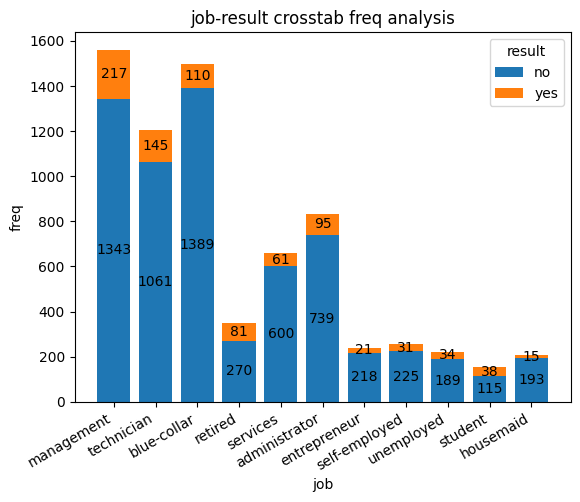

In [72]:
fig, ax = plt.subplots()

p1 = ax.bar(job_result_freq.index, job_result_freq['no'], label = 'no')

p2 = ax.bar(job_result_freq.index, job_result_freq['yes'], label = 'yes',
bottom = job_result_freq['no'])

ax.set_xlabel('job')
ax.set_ylabel('freq')
ax.set_title('job-result crosstab freq analysis')

ax.bar_label(ax.containers[0], label_type = 'center') #첫번째 바 숫자 표시
ax.bar_label(ax.containers[1], label_type = 'center') #두번째 바 숫자 표시
# edge or center 만 표시 가능
# edge 쓰면 합계가 표시될 수 있으니 주의

ax.set_xticklabels(job_result_freq.index, rotation = 30, horizontalalignment = 'right')
ax.legend([p1, p2], ['no','yes'], title = 'result') #상단 표시 박스




# dodge graph

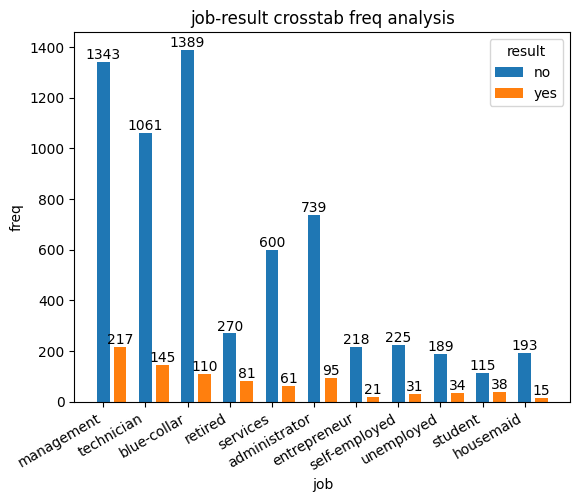

In [73]:
fig, ax = plt.subplots()

index = np.arange(len(job_result_freq.index))

p1 = ax.bar(index, job_result_freq['no'], width = 0.3)
p2 = ax.bar(index + 0.4, job_result_freq['yes'], width = 0.3)

ax.set_xlabel('job')
ax.set_ylabel('freq')
ax.set_title('job-result crosstab freq analysis')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

ax.set_xticks(index, job_result_freq.index, rotation = 30, horizontalalignment = 'right')
ax.legend([p1,p2], ['no','yes'], title = 'result')


## 교차분석 비율그래프

C:\Users\qwekl\AppData\Local\Temp\ipykernel_28568\3564519963.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(job_result_rate.index, rotation = 30, horizontalalignment = 'right')


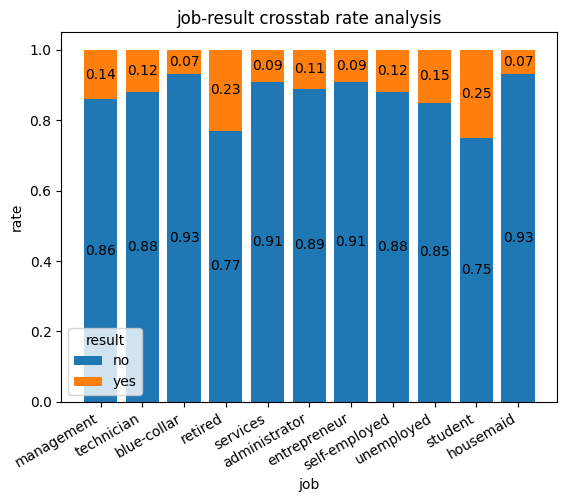

In [78]:
fig, ax = plt.subplots()

job_result_rate = job_result_rate.round(2)
ax.bar(job_result_rate.index, job_result_rate['no'], label = 'no')
ax.bar(job_result_rate.index, job_result_rate['yes'], label = 'yes',
bottom = job_result_rate['no'])

ax.set_xlabel('job')
ax.set_ylabel('rate')
ax.set_title('job-result crosstab rate analysis')

ax.bar_label(ax.containers[0], label_type = 'center')
ax.bar_label(ax.containers[1], label_type = 'center')

ax.set_xticklabels(job_result_rate.index, rotation = 30, horizontalalignment = 'right')
ax.legend([p1, p2], ['no', 'yes'], loc = 'lower left', title = 'result')